In [3]:
from approximations import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pickle

In [4]:
with open('results_MSB_paramgrid_500.pkl', 'rb') as f:
    param_grid, results_msb = pickle.load(f)
    
noise_levels = np.logspace(-6, np.log(0.5), 500)

# helper functions to calculate frequencies of m1 and M1 from simulation

genotype_names_3 = []
for i in range(3):
    for j in range(2):
        for k in range(5):
            genotype_names_3.append((i,j,k))

def mutator_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        #if (genotypes_names[g][0] > 0 or genotypes_names[g][2] > 0) and genotypes_names[g][1] == 1:
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 1:
            p += pop_vec[g]
    return(p)

def baseline_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        #if (genotypes_names[g][0] > 0 or genotypes_names[g][2] > 0) and genotypes_names[g][1] == 0:
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 0:
            p += pop_vec[g]
    return(p)

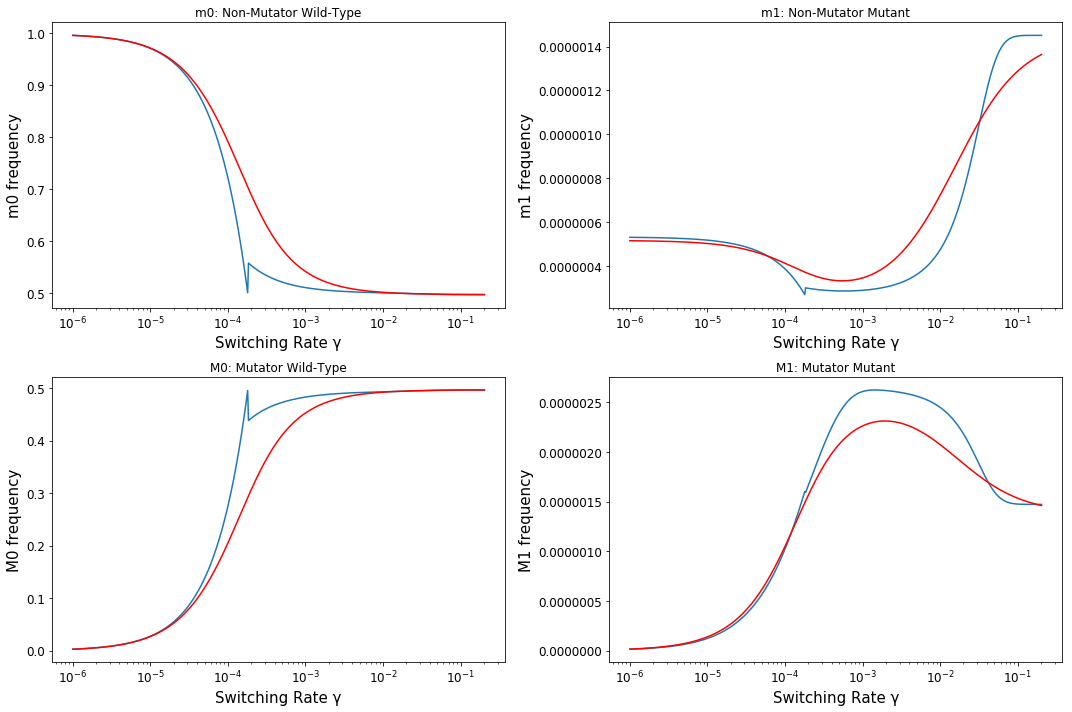

In [7]:
fig, ax = plt.subplots(2,2, figsize = (15,10))

plot_params = [6]

for n in plot_params:
    
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    
    # m0
    m0_sim_6 = [results_msb[n][i]['pop'][0] for i in range(len(noise_levels))]
    m0_approx_6 = [calculate_m0(noise, mu, tau, s) for noise in noise_levels]
    
    
    # m1
    m1_sim_6 = [baseline_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    m1_approx_6 = [calculate_m1(noise, mu, tau, s)/2500 for noise in noise_levels]
    
    
    # M0
    M0_sim_6 = [results_msb[n][i]['pop'][5] for i in range(len(noise_levels))]
    M0_approx_6 = [calculate_M0(noise, mu, tau, s) for noise in noise_levels]
    
    
    # M1
    M1_sim_6 = [mutator_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]    
    M1_approx_6 = [calculate_M1(noise, mu, tau, s)/2500 for noise in noise_levels]
    
    
    ax[0,0].plot(noise_levels, m0_approx_6)
    ax[0,0].plot(noise_levels, m0_sim_6, c = 'red')
    #ax[0,0].scatter(noise_levels, m0_sim_6, marker = '*', c = 'r')
    
    ax[0,0].set_xscale('log')
    
    
    ax[0,1].plot(noise_levels, m1_approx_6)
    ax[0,1].plot(noise_levels, m1_sim_6, c = 'red')
    #ax[0,1].scatter(noise_levels, m1_sim_6, marker = '*', c = 'r')
    
    ax[0,1].set_xscale('log')
    
    
    ax[1,0].plot(noise_levels, M0_approx_6)
    ax[1,0].plot(noise_levels, M0_sim_6, c = 'red')
    #ax[1,0].scatter(noise_levels, M0_sim_6, marker = '*', c = 'r')
    
    ax[1,0].set_xscale('log')
    
    ax[1,1].plot(noise_levels, M1_approx_6)
    ax[1,1].plot(noise_levels, M1_sim_6, c = 'red')
    #ax[1,1].scatter(noise_levels, M1_sim_6, marker = '*', c = 'r')
    ax[1,1].set_xscale('log')
    
    ax[0,0].set_ylabel('m0 frequency', fontsize = 15)
    ax[0,1].set_ylabel('m1 frequency', fontsize = 15)  
    ax[1,0].set_ylabel('M0 frequency', fontsize = 15)
    ax[1,1].set_ylabel('M1 frequency', fontsize = 15)
    
    ax[0,0].set_xlabel('Switching Rate γ', fontsize = 15)
    ax[1,0].set_xlabel('Switching Rate γ', fontsize = 15)
    ax[0,1].set_xlabel('Switching Rate γ', fontsize = 15)
    ax[1,1].set_xlabel('Switching Rate γ', fontsize = 15)
    
    ax[0,0].set_title('m0: Non-Mutator Wild-Type')
    ax[1,0].set_title('M0: Mutator Wild-Type')
    
    ax[0,1].set_title('m1: Non-Mutator Mutant')
    ax[1,1].set_title('M1: Mutator Mutant')
    
    ax[0,0].tick_params(labelsize = 12)
    ax[0,1].tick_params(labelsize = 12)
    ax[1,0].tick_params(labelsize = 12)
    ax[1,1].tick_params(labelsize = 12)
    
    plt.tight_layout()
    
    plt.savefig('Comparison_m0_m1_M0_M1_mu='+str(mu)+'_s='+str(s)+'_tau='+str(tau)+'_new.jpg', bbox_inches='tight')
    

    plt.show()
    

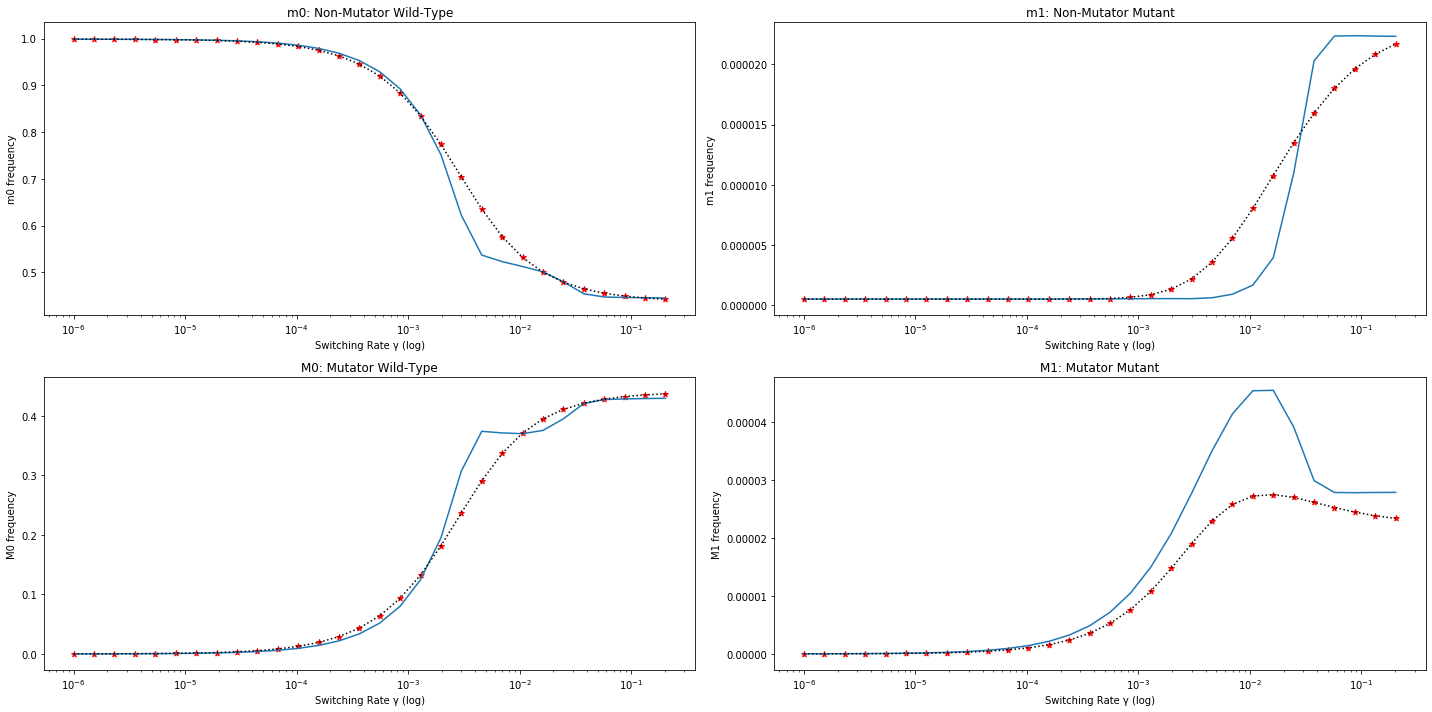

In [4]:
fig, ax = plt.subplots(2,2, figsize = (20,10))

plot_params = [8]

for n in plot_params:
    
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    
    # m0
    m0_sim_8 = [results_msb[n][i]['pop'][0] for i in range(len(noise_levels))]
    m0_approx_8 = [calculate_m0(noise, mu, tau, s) for noise in noise_levels]
    
    
    # m1
    m1_sim_8 = [baseline_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    m1_approx_8 = [calculate_m1(noise, mu, tau, s)/2500 for noise in noise_levels]
    
    
    # M0
    M0_sim_8 = [results_msb[n][i]['pop'][5] for i in range(len(noise_levels))]
    M0_approx_8 = [calculate_M0(noise, mu, tau, s) for noise in noise_levels]
    
    
    # M1
    M1_sim_8 = [mutator_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]    
    M1_approx_8 = [calculate_M1(noise, mu, tau, s)/2500 for noise in noise_levels]
    
    
    ax[0,0].plot(noise_levels, m0_approx_8)
    ax[0,0].plot(noise_levels, m0_sim_8, linestyle = 'dotted', c = 'k')
    ax[0,0].scatter(noise_levels, m0_sim_8, marker = '*', c = 'r')
    
    ax[0,0].set_xscale('log')
    
    
    ax[0,1].plot(noise_levels, m1_approx_8)
    ax[0,1].plot(noise_levels, m1_sim_8, linestyle = 'dotted', c = 'k')
    ax[0,1].scatter(noise_levels, m1_sim_8, marker = '*', c = 'r')
    
    ax[0,1].set_xscale('log')
    
    
    ax[1,0].plot(noise_levels, M0_approx_8)
    ax[1,0].plot(noise_levels, M0_sim_8, linestyle = 'dotted', c = 'k')
    ax[1,0].scatter(noise_levels, M0_sim_8, marker = '*', c = 'r')
    
    ax[1,0].set_xscale('log')
    
    ax[1,1].plot(noise_levels, M1_approx_8)
    ax[1,1].plot(noise_levels, M1_sim_8, linestyle = 'dotted', c = 'k')
    ax[1,1].scatter(noise_levels, M1_sim_8, marker = '*', c = 'r')
    ax[1,1].set_xscale('log')
    
    ax[0,0].set_ylabel('m0 frequency')
    ax[0,1].set_ylabel('m1 frequency')  
    ax[1,0].set_ylabel('M0 frequency')
    ax[1,1].set_ylabel('M1 frequency')
    
    ax[0,0].set_xlabel('Switching Rate γ (log)')
    ax[1,0].set_xlabel('Switching Rate γ (log)')
    ax[0,1].set_xlabel('Switching Rate γ (log)')
    ax[1,1].set_xlabel('Switching Rate γ (log)')
    
    ax[0,0].set_title('m0: Non-Mutator Wild-Type')
    ax[1,0].set_title('M0: Mutator Wild-Type')
    
    ax[0,1].set_title('m1: Non-Mutator Mutant')
    ax[1,1].set_title('M1: Mutator Mutant')
    
    plt.savefig('Comparison_m0_m1_M0_M1_mu='+str(mu)+'_s='+str(s)+'_tau='+str(tau)+'.jpg', bbox_inches='tight')
    
    plt.tight_layout()
    plt.show()
    

## Calculation R2

In [25]:
plot_params = [8]

for n in plot_params:
    
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    
    # m0
    m0_sim = [results_msb[n][i]['pop'][0] for i in range(len(noise_levels))]
    m0_approx = [calculate_m0(noise, mu, tau, s) for noise in noise_levels]
    
    print('m0: ', scipy.stats.pearsonr(m0_sim, m0_approx)[0]**2)
    
    
    # m1
    m1_sim = [baseline_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    m1_approx = [calculate_m1(noise, mu, tau, s) for noise in noise_levels]

    print('m1: ', scipy.stats.pearsonr(m1_sim, m1_approx)[0]**2)    
    
    # M0
    M0_sim = [results_msb[n][i]['pop'][5] for i in range(len(noise_levels))]
    M0_approx = [calculate_M0(noise, mu, tau, s) for noise in noise_levels]
    
    print('M0: ', scipy.stats.pearsonr(M0_sim, M0_approx)[0]**2)
    
    # M1
    M1_sim = [mutator_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]    
    M1_approx = [calculate_M1(noise, mu, tau, s) for noise in noise_levels]
    
    print('M1: ', scipy.stats.pearsonr(M1_sim, M1_approx)[0]**2)

m0:  0.989821741730287
m1:  0.9156655750701266
M0:  0.9857605884468674
M1:  0.962557615938094


## Whole Parameter Grid

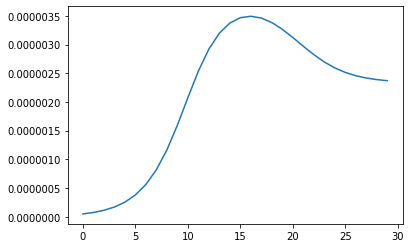

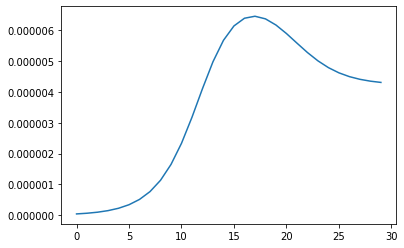

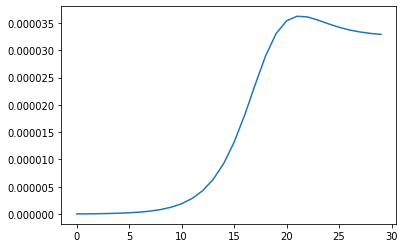

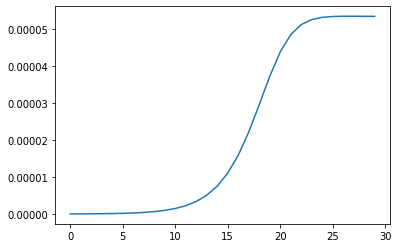

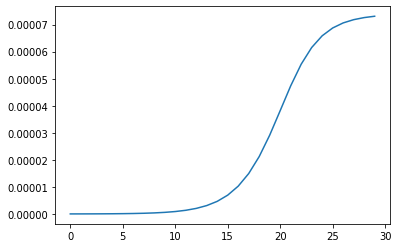

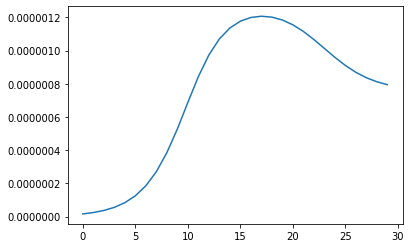

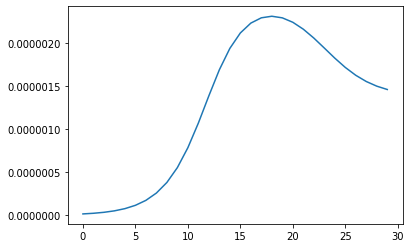

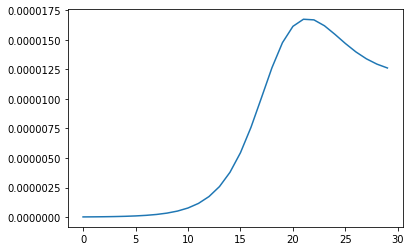

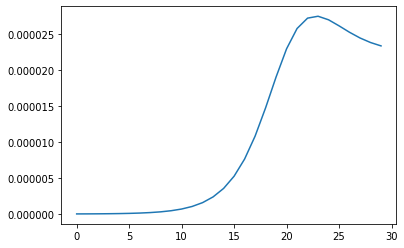

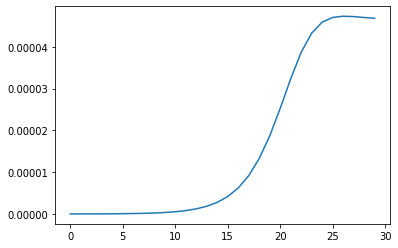

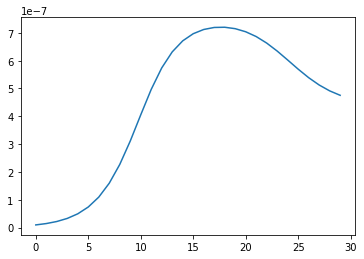

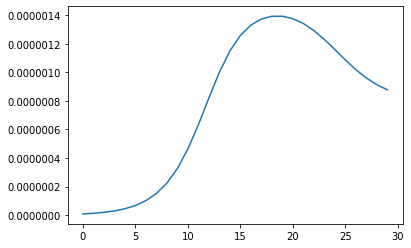

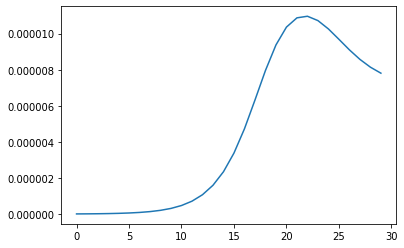

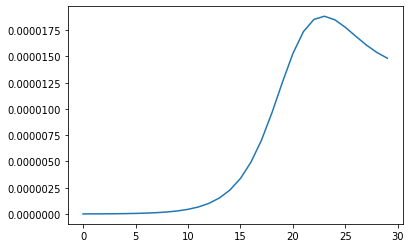

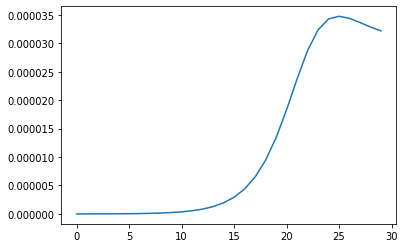

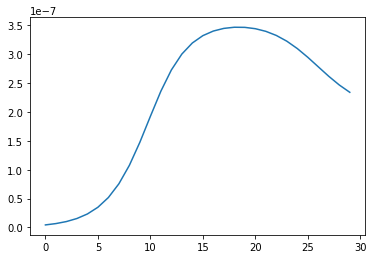

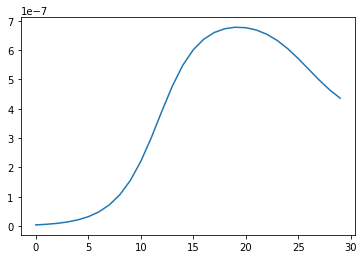

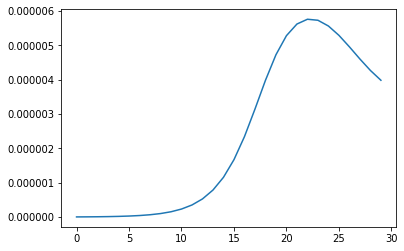

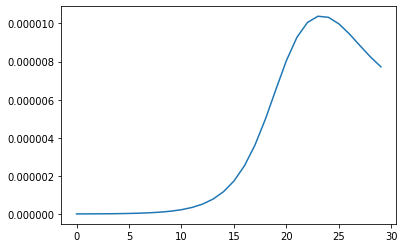

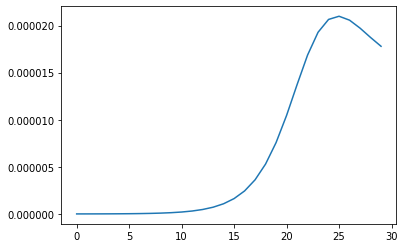

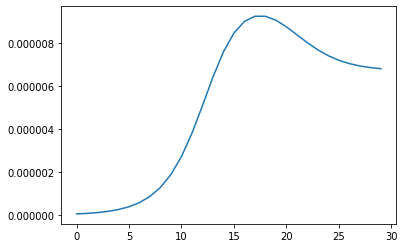

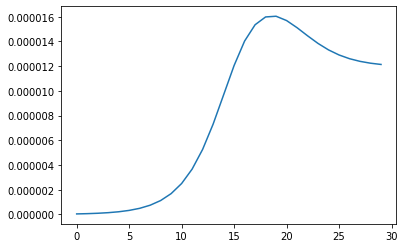

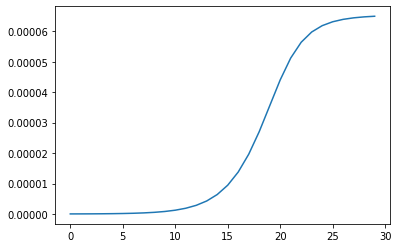

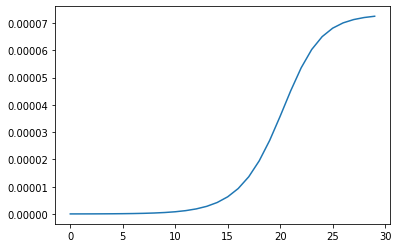

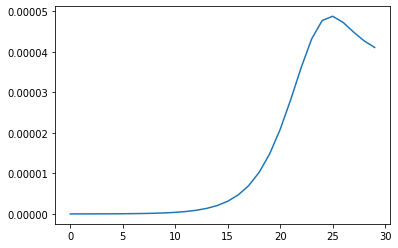

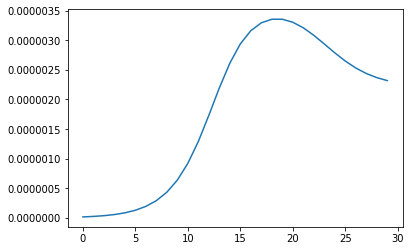

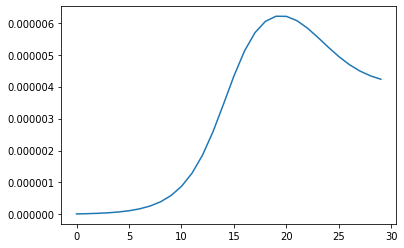

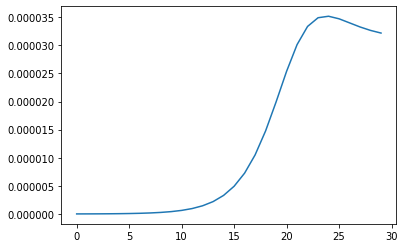

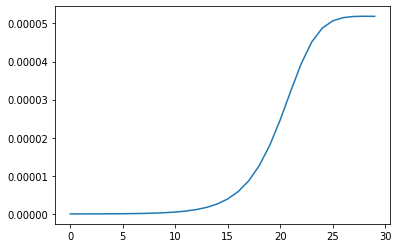

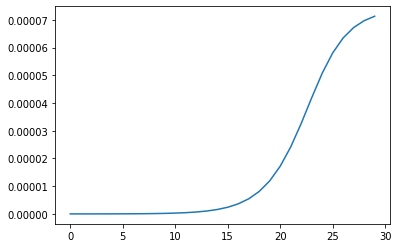

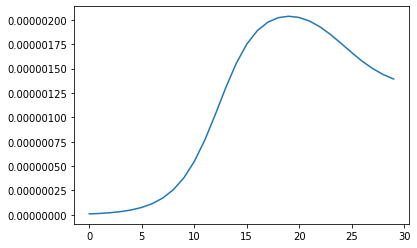

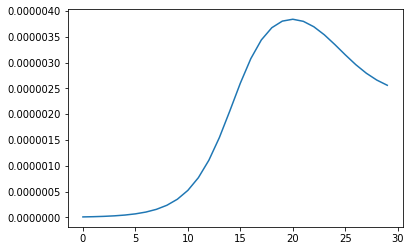

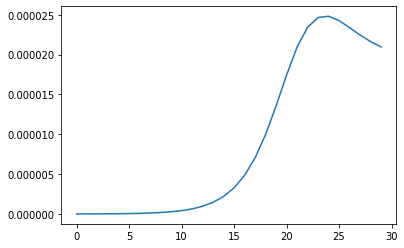

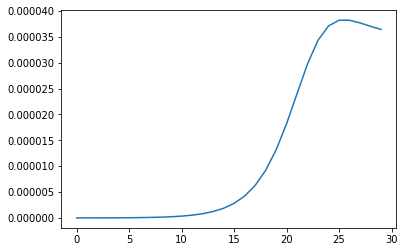

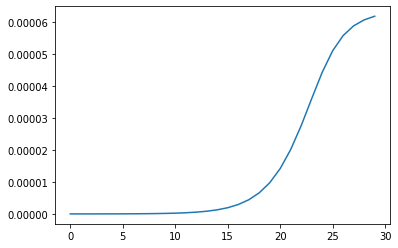

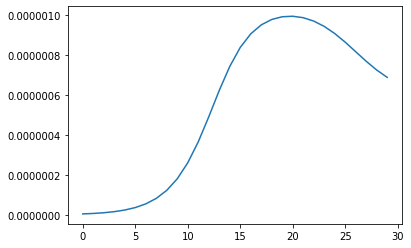

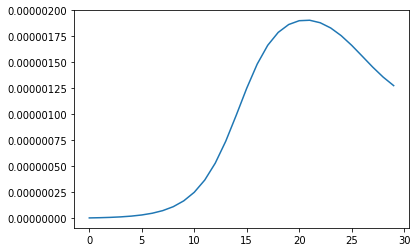

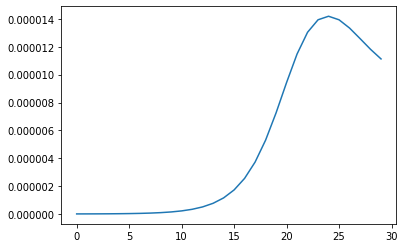

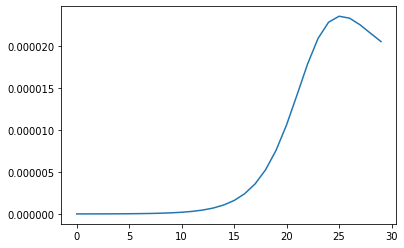

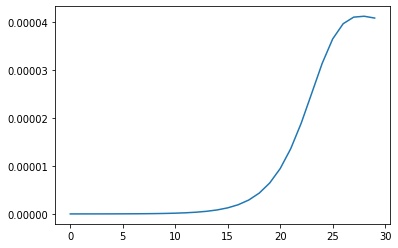

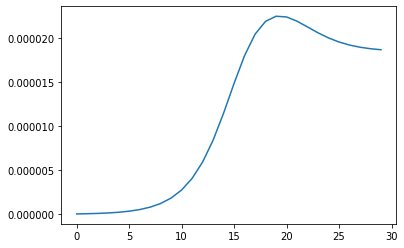

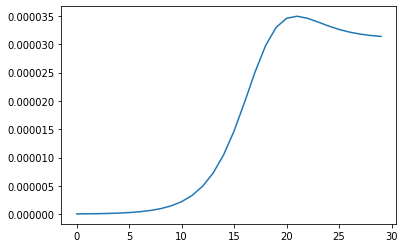

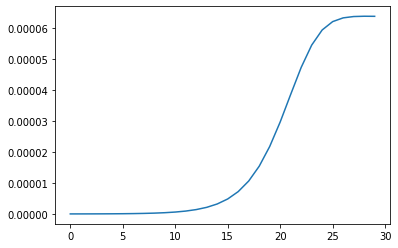

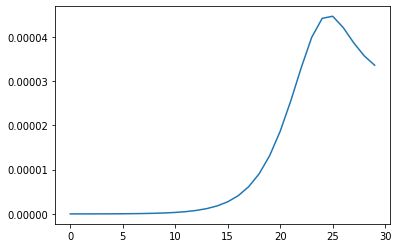

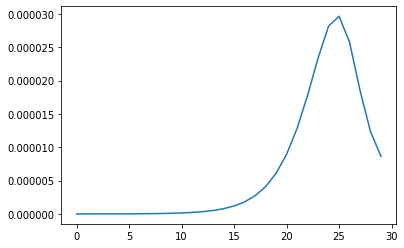

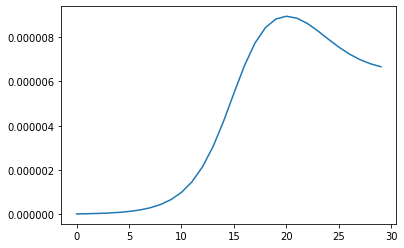

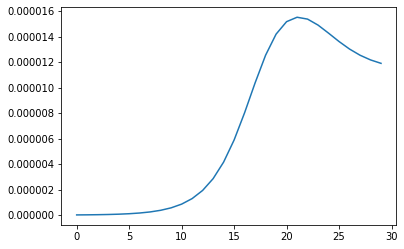

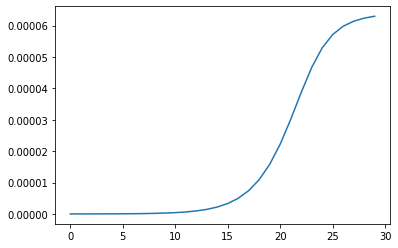

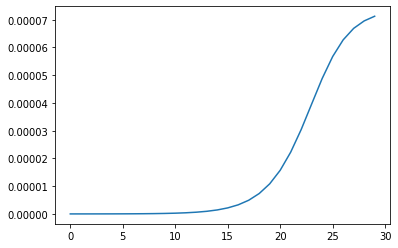

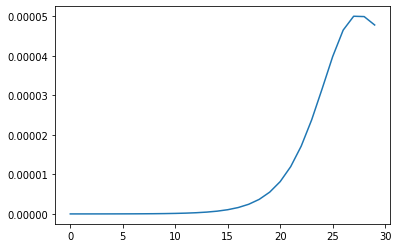

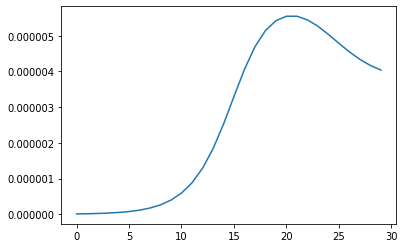

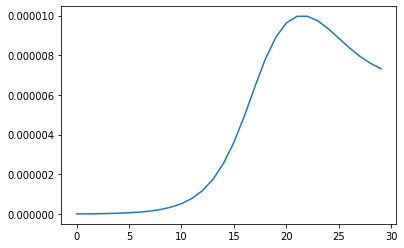

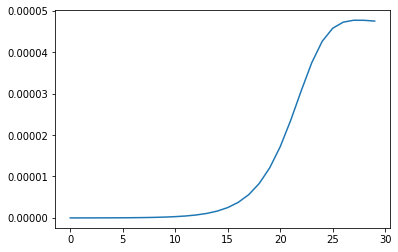

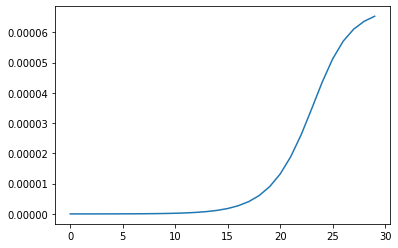

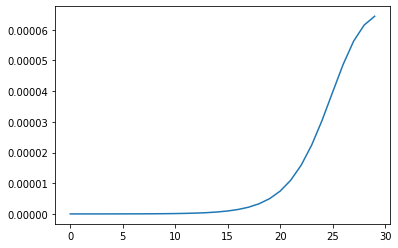

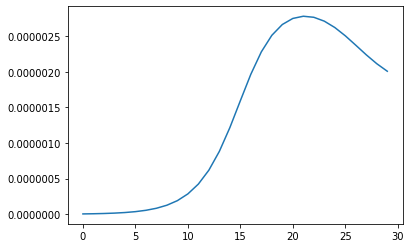

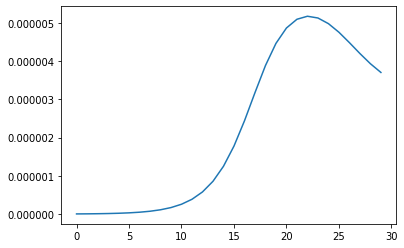

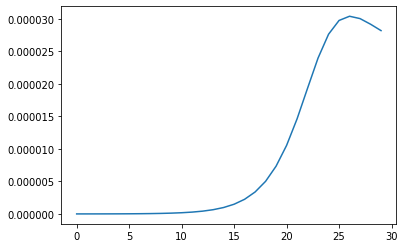

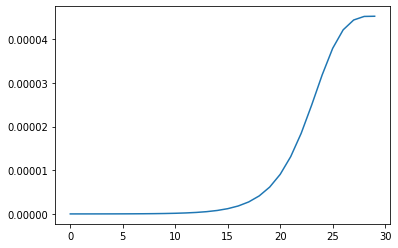

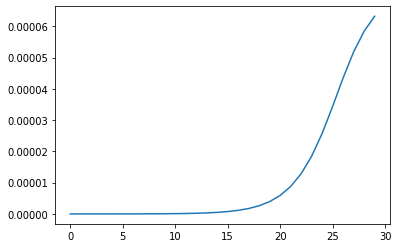

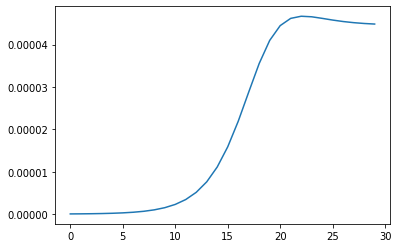

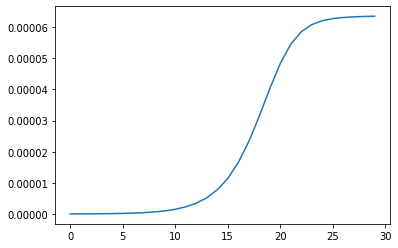

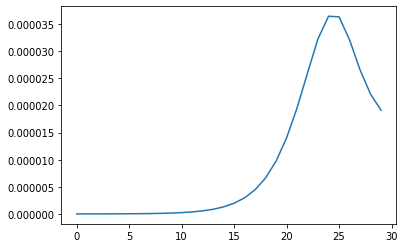

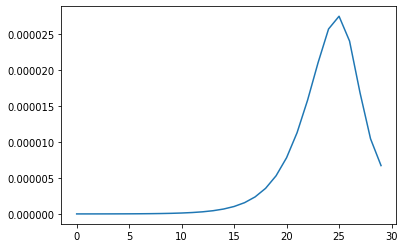

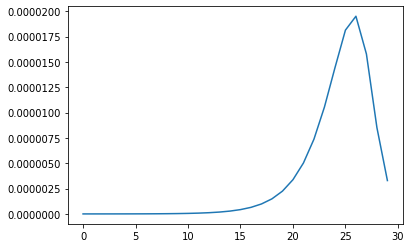

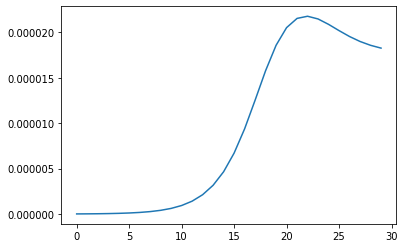

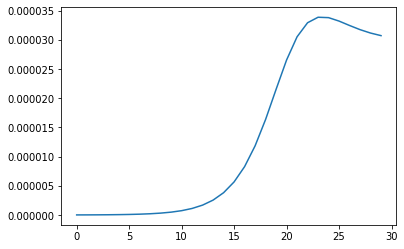

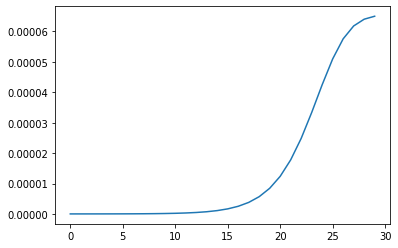

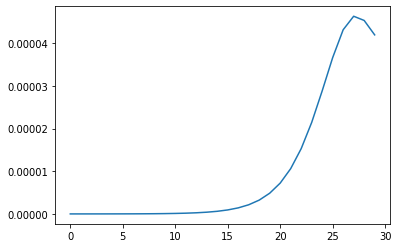

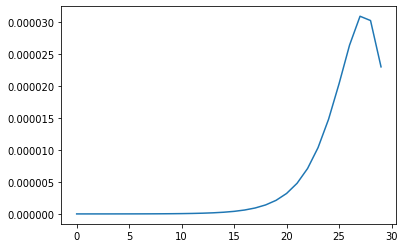

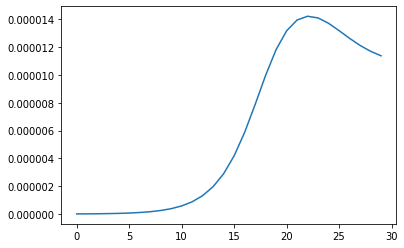

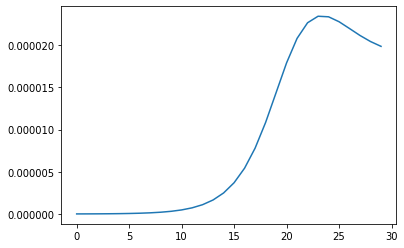

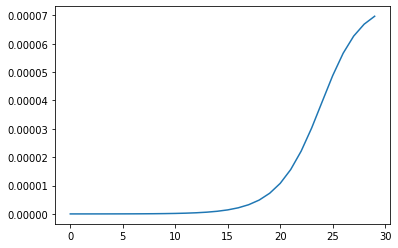

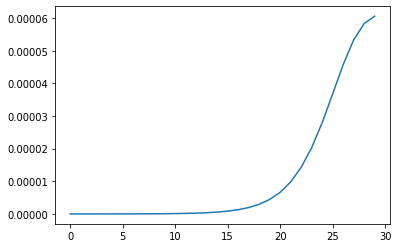

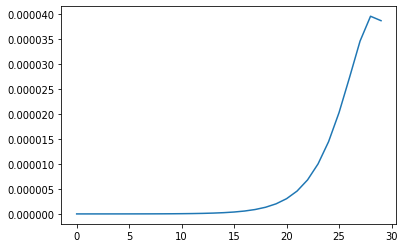

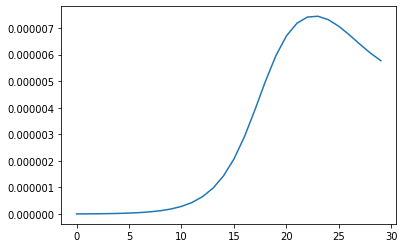

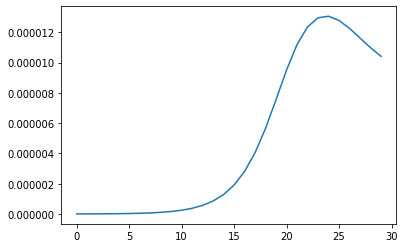

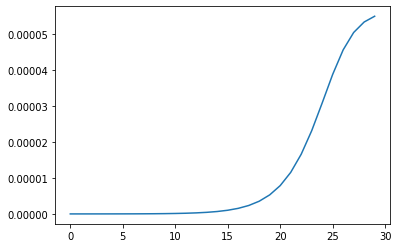

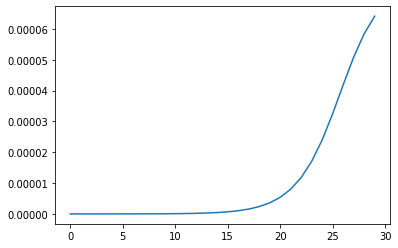

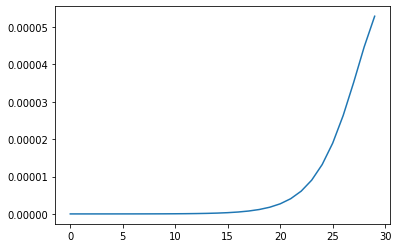

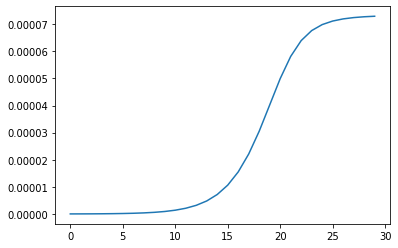

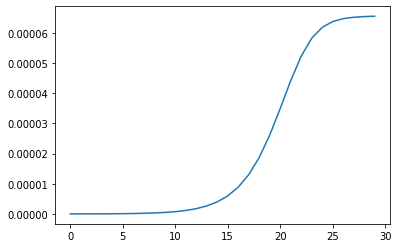

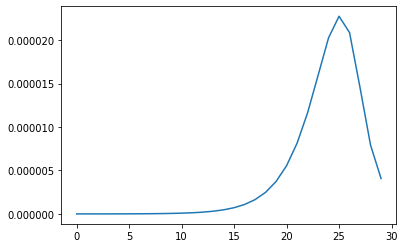

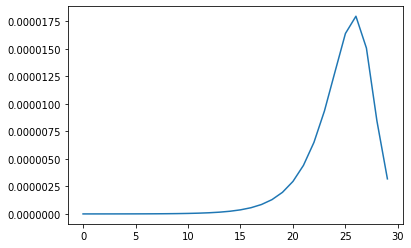

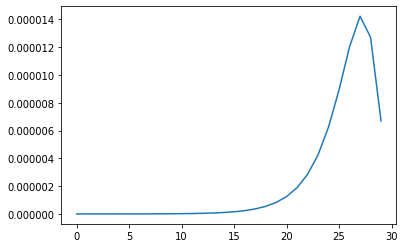

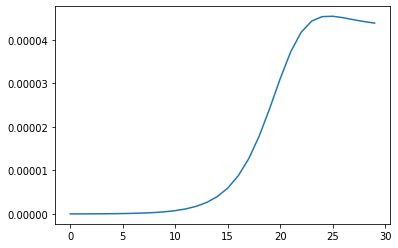

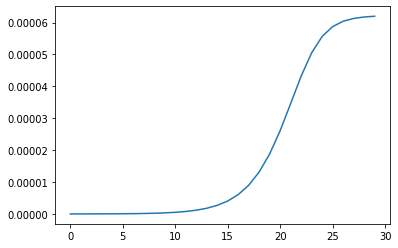

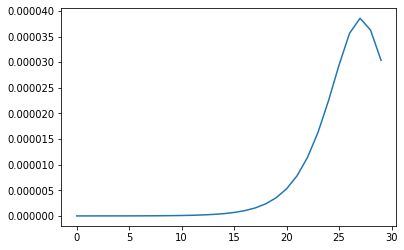

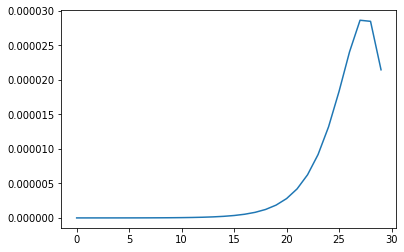

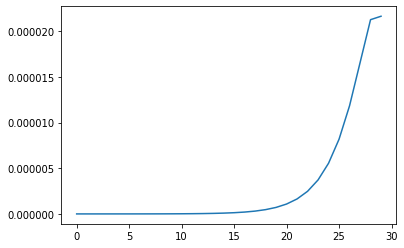

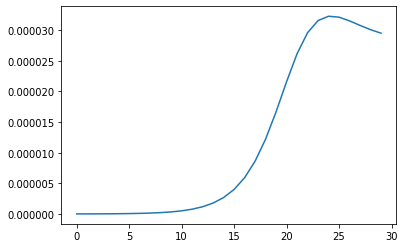

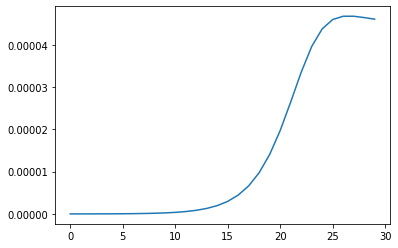

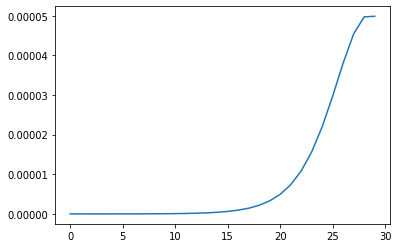

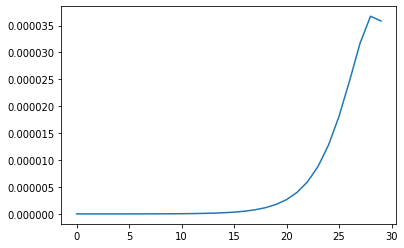

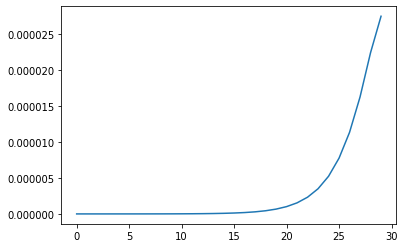

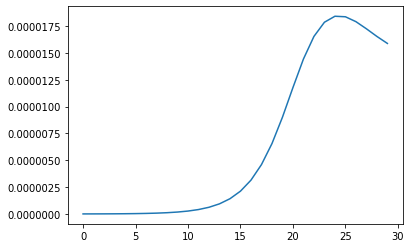

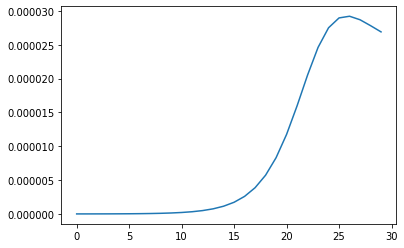

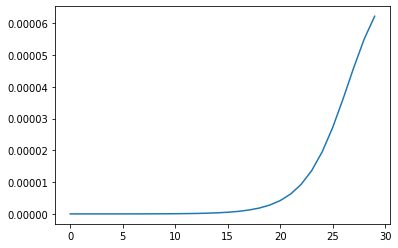

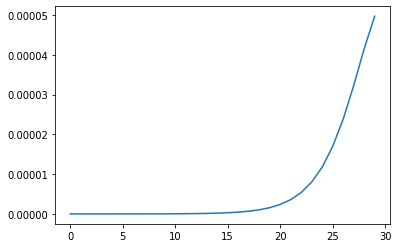

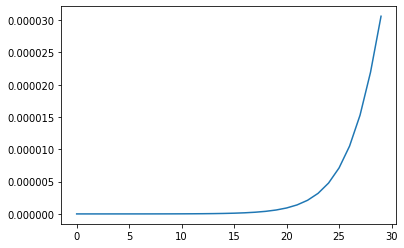

In [17]:
all_predictions = []

for n in range(len(param_grid)):
    
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    
    m0_sim = [results_msb[n][i]['pop'][0] for i in range(len(noise_levels))]
    m0_approx = [calculate_m0(noise, mu, tau, s) for noise in noise_levels]
    
    m1_sim = [baseline_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    m1_approx = [calculate_m1(noise, mu, tau, s)/2500 for noise in noise_levels]
    
    M0_sim = [results_msb[n][i]['pop'][5] for i in range(len(noise_levels))]
    M0_approx = [calculate_M0(noise, mu, tau, s) for noise in noise_levels]
    
    M1_sim = [mutator_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]    
    M1_approx = [calculate_M1(noise, mu, tau, s)/2500 for noise in noise_levels]
     
    all_predictions.append({'n': n, 'mu':mu, 'tau': tau, 's': s, 'm0_sim': m0_sim, 'm1_sim': m1_sim, 'M0_sim': M0_sim, 'M1_sim': M1_sim, 'm0_approx': m0_approx, 'm1_approx': m1_approx, 'M0_approx': M0_approx, 'M1_approx': M1_approx})
    
    plt.plot(M1_sim)
    plt.show()

In [10]:
with open('m1_M1_param_6_8.pkl', 'wb') as f:
    pickle.dump([{'param_set': 6, 'sim_m1': m1_sim_6, 'approx_m1': m1_approx_6, 'sim_M1': M1_sim_6, 'approx_M1': M1_approx_6}, {'param_set': 8, 'sim_m1': m1_sim_8, 'approx_m1': m1_approx_8, 'sim_M1': M1_sim_8, 'approx_M1': M1_approx_8}], f)

In [19]:
with open('m0_m1_M0_M1_all_param_grid.pkl', 'wb') as f:
    pickle.dump([param_grid, all_predictions], f)